In [1]:
# Read the data from the file q-gdpmc1.txt
data <- read.table("q-gdpmc1.txt", header = TRUE)

# Add log transformation of GDP per capita to data
data$log_gdp <- log(data$gdp)

# Add first differencing of log GDP per capita to data
data$growth_rate <- c(0, diff(data$log_gdp))

#Display the first few rows of the data
print(head(data))

  year month day     gdp  log_gdp   growth_rate
1 1947     1   1 1770691 14.38688  0.0000000000
2 1947     4   1 1767976 14.38535 -0.0015344764
3 1947     7   1 1766523 14.38452 -0.0008221816
4 1947    10   1 1793310 14.39957  0.0150498664
5 1948     1   1 1821809 14.41534  0.0157668892
6 1948     4   1 1855345 14.43358  0.0182406991



Call:
arima(x = data$growth_rate, order = c(3, 0, 0))

Coefficients:
         ar1     ar2      ar3  intercept
      0.3484  0.1293  -0.1135     0.0077
s.e.  0.0610  0.0642   0.0610     0.0009

sigma^2 estimated as 8.142e-05:  log likelihood = 868.2,  aic = -1726.4


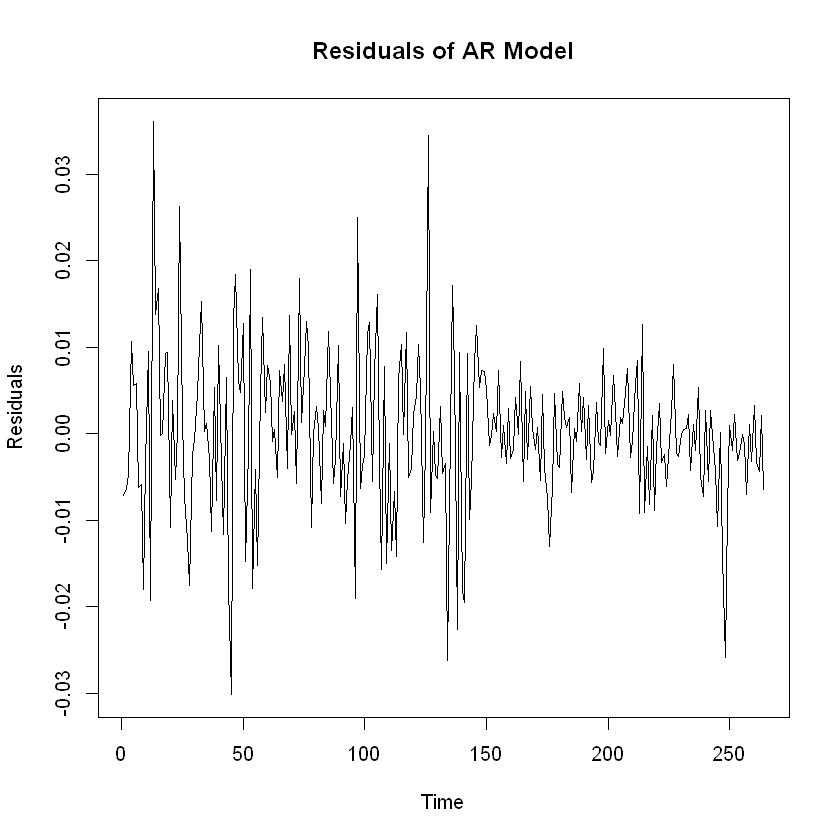


	Box-Ljung test

data:  residuals(ar_model)
X-squared = 20.968, df = 20, p-value = 0.399


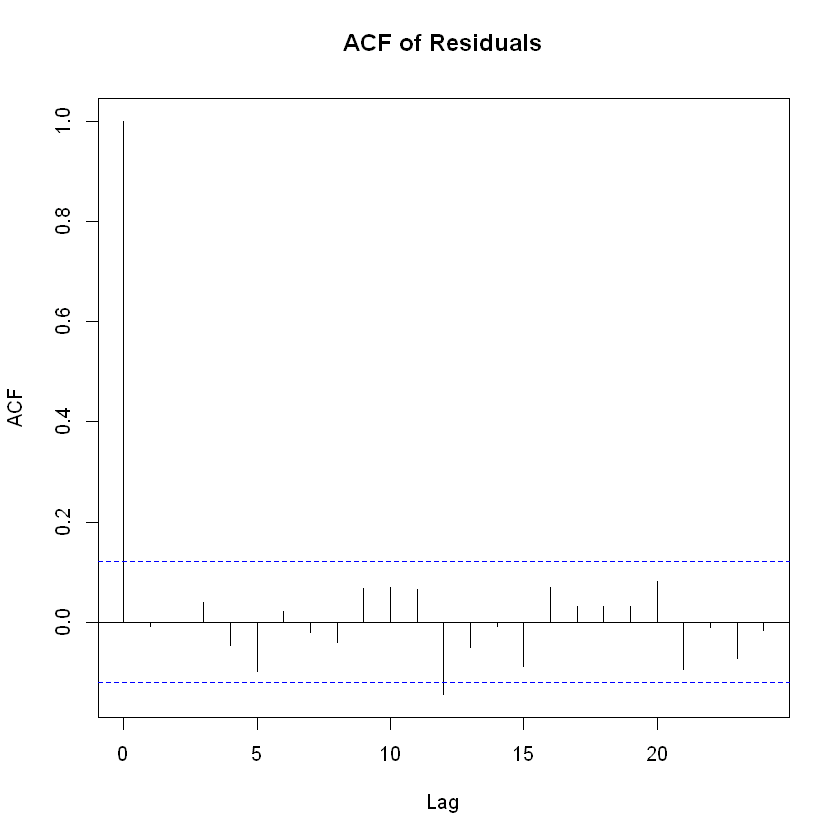

In [2]:
# Load necessary libraries
library(stats)

# Fit an AR model to the growth rate series
ar_model <- arima(data$growth_rate, order = c(3, 0, 0)) # AR(3) model

# Display the fitted model
print(ar_model)

# Plot residuals
plot(residuals(ar_model), main="Residuals of AR Model", ylab="Residuals")

# Plot ACF of residuals
acf(residuals(ar_model), main="ACF of Residuals")

# Perform Ljung-Box test
Box.test(residuals(ar_model), lag=20, type="Ljung-Box")

In [3]:
# Extract AR coefficients
ar_coefficients <- ar_model$coef[1:3]

# Form the characteristic polynomial (1 - theta1*B - theta*B^2 - theta3*B^3 = 0)
# where L is the lag operator
characteristic_polynomial <- c(1, -ar_coefficients)

# Find the roots of the polynomial
roots <- polyroot(characteristic_polynomial)

# Display the roots
print(roots)

# Analyze the roots
modulus <- Mod(roots)
cat("Modulus of the roots:", modulus, "\n")

# Check if any roots are complex and have modulus close to 1
if (any(Im(roots) != 0 & modulus < 1)) {
  cat("The model confirms the existence of business cycles.\n")
} else {
  cat("The model does not confirm the existence of business cycles.\n")
}

[1]  1.651388+1.160624e+00i -2.163306+5.369019e-15i  1.651388-1.160624e+00i
Modulus of the roots: 2.018447 2.163306 2.018447 
The model does not confirm the existence of business cycles.


In [4]:
# Assuming ar_model is already fitted to the data
# Generate 1-step to 8-step ahead forecasts
forecasts <- predict(ar_model, n.ahead = 8)

# Extract point forecasts and standard errors
point_forecasts <- forecasts$pred
standard_errors <- forecasts$se

# Calculate 99% confidence intervals
alpha <- 0.01
z_value <- qnorm(1 - alpha / 2)
lower_bounds <- point_forecasts - z_value * standard_errors
upper_bounds <- point_forecasts + z_value * standard_errors

# Display the results
forecast_results <- data.frame(
  Step = 1:8,
  PointForecast = point_forecasts,
  LowerBound99 = lower_bounds,
  UpperBound99 = upper_bounds
)

print(forecast_results)

  Step PointForecast LowerBound99 UpperBound99
1    1   0.005871096  -0.01737110   0.02911329
2    2   0.006206663  -0.01840586   0.03081918
3    3   0.007720364  -0.01757236   0.03301309
4    4   0.007732366  -0.01756419   0.03302892
5    5   0.007894174  -0.01740238   0.03319073
6    6   0.007780355  -0.01752352   0.03308423
7    7   0.007760257  -0.01754499   0.03306550
8    8   0.007720180  -0.01758563   0.03302599
